In [1]:
#!pip install missingno
#!pip install folium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 2.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.1/85.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.6/134.6 kB 9.1 MB/s eta 0:00:00
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import folium


## EDA

In [9]:
data = pd.read_csv("housing.csv")

In [10]:
data.head()


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


## Missing value management

<AxesSubplot:>

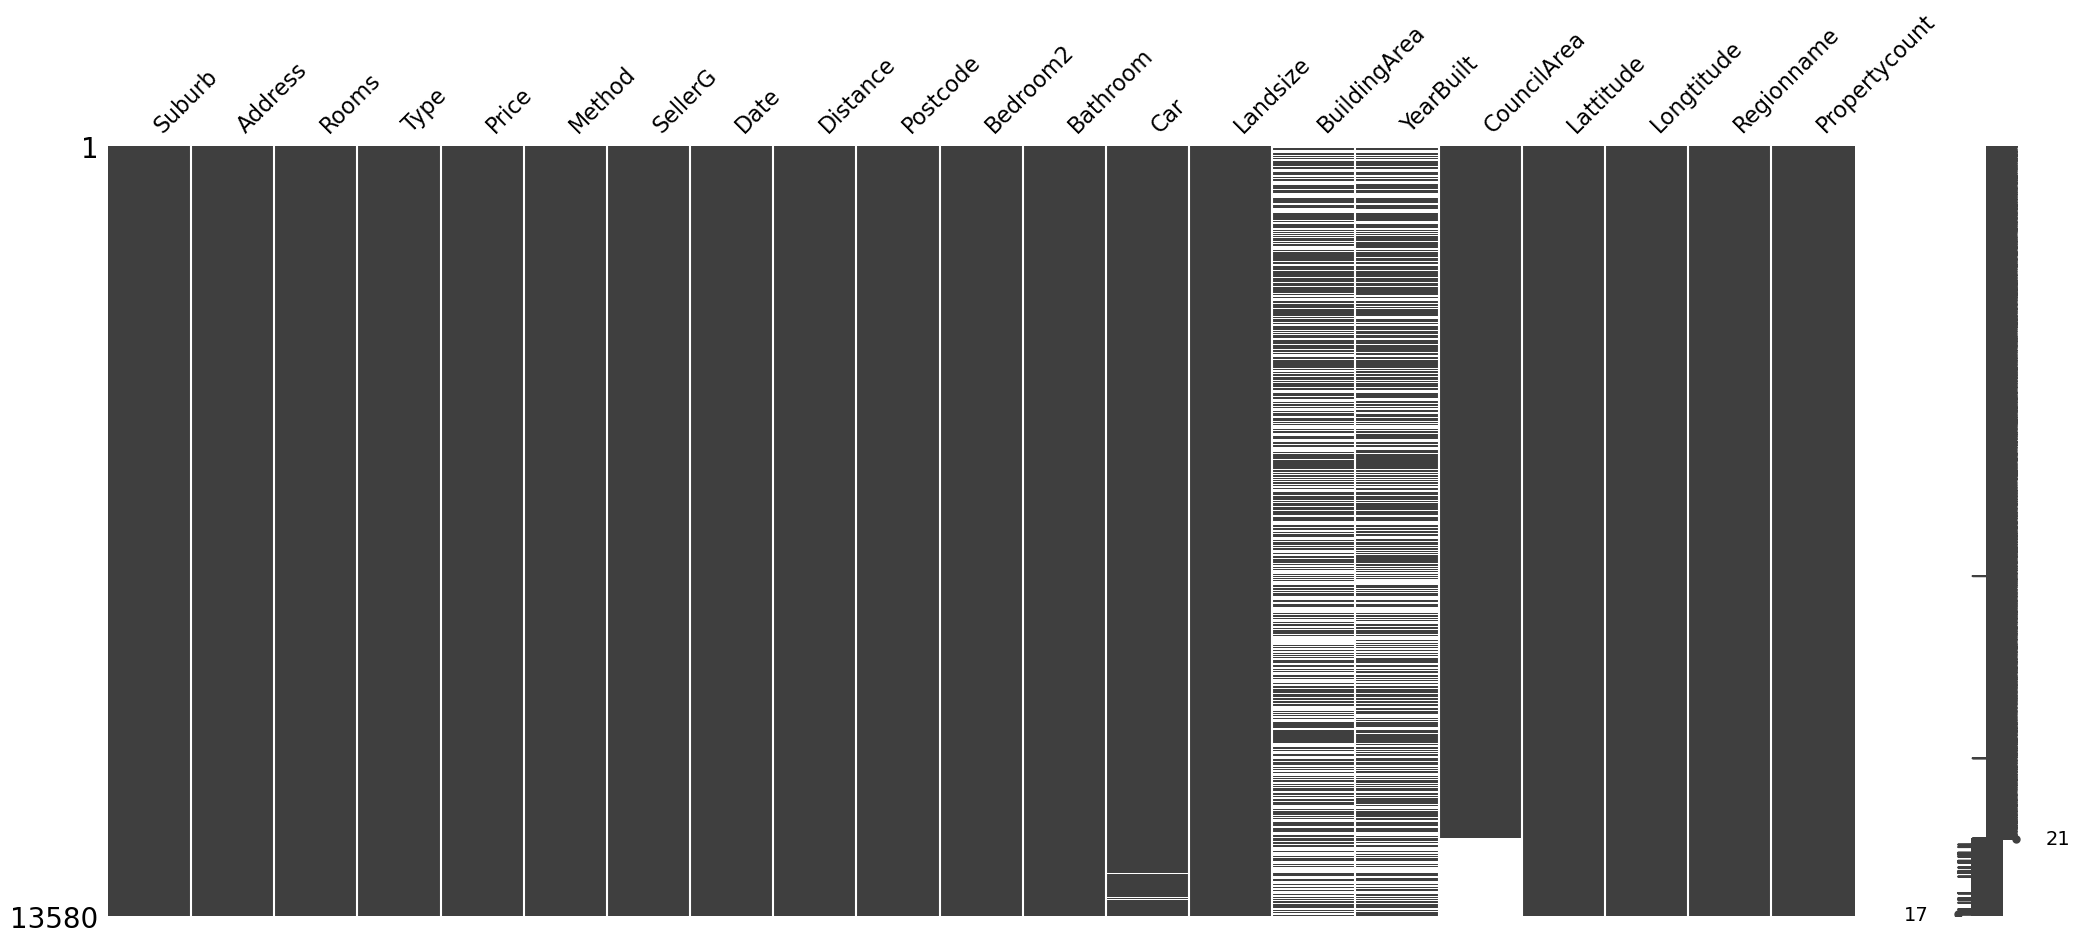

In [11]:

msno.matrix(data)

In [12]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## Focus on CouncilArea since they are not missing at random

In [13]:
datanull = data[data['CouncilArea'].isnull()]

In [14]:
datanull.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
7584,Brighton East,7 Roberts Ct,3,h,1270000.0,VB,Ray,20/05/2017,10.7,3187.0,...,1.0,3.0,724.0,NaN,NaN,NaN,-37.92910,145.02970,Southern Metropolitan,6938.0
10797,Reservoir,48 Crevelli St,3,h,526250.0,SP,Barry,8/07/2017,12.0,3073.0,...,1.0,1.0,308.0,NaN,NaN,NaN,-37.72828,145.03033,Northern Metropolitan,21650.0
12213,Aberfeldie,1 Alma St,4,h,1436000.0,S,Brad,3/09/2017,7.5,3040.0,...,3.0,3.0,511.0,187.0,1922.0,NaN,-37.75788,144.90487,Western Metropolitan,1543.0
12214,Albion,40 Ridley St,5,h,905000.0,S,hockingstuart,3/09/2017,10.5,3020.0,...,2.0,3.0,732.0,NaN,1925.0,NaN,-37.78345,144.82295,Western Metropolitan,2185.0
12215,Alphington,22 Harker St,4,h,1680000.0,S,Love,3/09/2017,5.7,3078.0,...,3.0,2.0,720.0,NaN,NaN,NaN,-37.77928,145.02993,Northern Metropolitan,2211.0


# Missing values are due to the date

In [15]:
datafiltered = datanull[datanull['CouncilArea'].isnull()]

In [16]:
datafiltered['Date'].sort_values()

12859    16/09/2017
12777    16/09/2017
12778    16/09/2017
12779    16/09/2017
12780    16/09/2017
            ...    
12498     9/09/2017
12499     9/09/2017
12500     9/09/2017
12490     9/09/2017
12630     9/09/2017
Name: Date, Length: 1369, dtype: object

## We can map a suburb to a council area and use the same mapping to infer on the missing council areas and we assume they don't change 

## PostalCode even better

In [17]:
suburbcorrespondent = data.groupby('Suburb')['CouncilArea'].nunique()

In [18]:
suburbs_with_multiple_council_areas = suburbcorrespondent [suburbcorrespondent  > 1]

# Count how many suburbs meet the condition
count = suburbs_with_multiple_council_areas.count()
print(count)

29


In [19]:
# multiple council areas for 29 suburbs, we pick the first one appearing in the dataset assuming the location won't differ drastically

In [20]:
grouped = data.groupby('Suburb')['CouncilArea'].first()

# Convert the grouped series to a dictionary
suburb_to_council = grouped.to_dict()

In [21]:
#if value of CouncilArea is nan , use the mapping between Suburb and CouncilArea
for index, row in data.iterrows():
    Suburb = row['Suburb']
    council_area = row['CouncilArea']
    
    # Check if CouncilArea is missing
    if pd.isnull(council_area):  # Correct way to check for NaN
        # Replace missing CouncilArea with value from dictionary
        data.at[index, 'CouncilArea'] = suburb_to_council.get(Suburb, council_area)

In [22]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea         7
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

## What about other values, naive median fill?



In [23]:
### Transformation of Price in the log form

In [24]:
data['LogPrice'] = np.log(data['Price'])

# Fixed effects analysis

In [25]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,LogPrice
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0,14.207553
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0,13.849912
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0,14.197366
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0,13.652992
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0,14.285514


## Analysis for Rooms ( number of rooms )

### Scatterplot LogPrice and Rooms

<AxesSubplot:xlabel='Rooms', ylabel='LogPrice'>

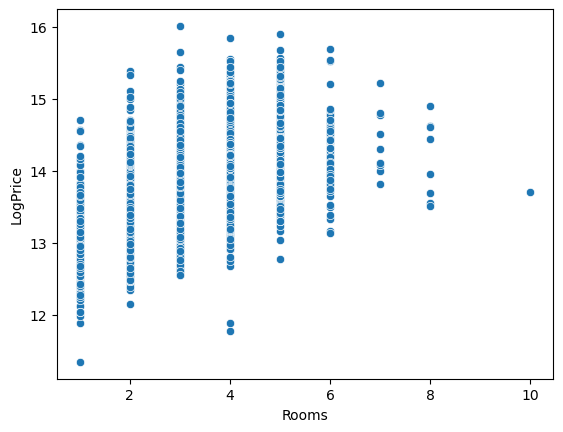

In [26]:
sns.scatterplot(x='Rooms', y='LogPrice', data=data)

In [27]:
#LogPrice is positively correlated with the number of rooms, the relationship seems to be not linear. When an house has more than 4 rooms 
#its LogPrice seems to be negatively related to the number of rooms. This could be caused by the fact that these houses are more distant from the center.

### Boxplot Rooms and Distance

<AxesSubplot:xlabel='Rooms', ylabel='Distance'>

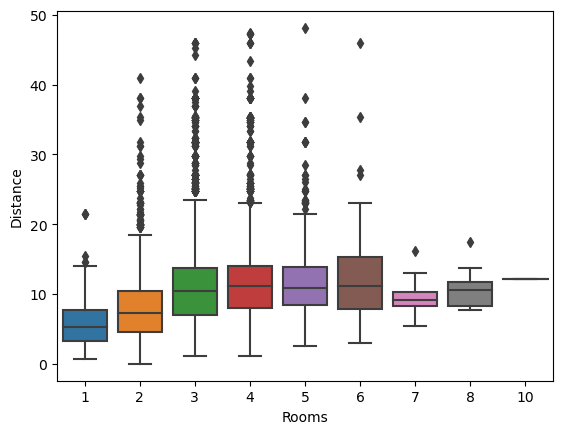

In [28]:
sns.boxplot(x='Rooms', y='Distance', data=data)

In [29]:
#Scatterplot seems to confirm the hypothesis above

## Analysis for Type


### Boxplot Type and LogPrice

<AxesSubplot:xlabel='Type', ylabel='LogPrice'>

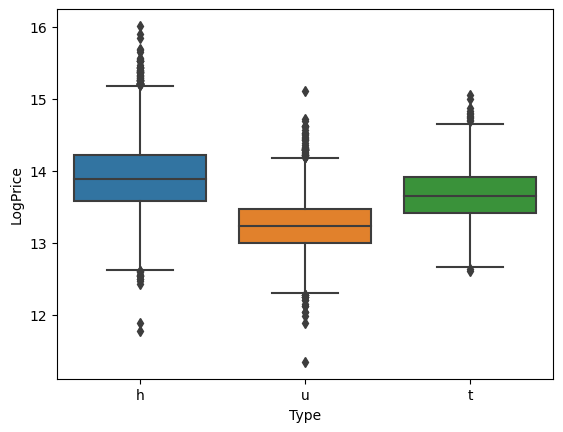

In [30]:
sns.boxplot(x='Type', y='LogPrice', data=data)

In [31]:
# h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse, h Type seems to have higher prices. Here the categorization is given 
# and we assume the h type is the most prestigious

## Interaction Rooms and Type

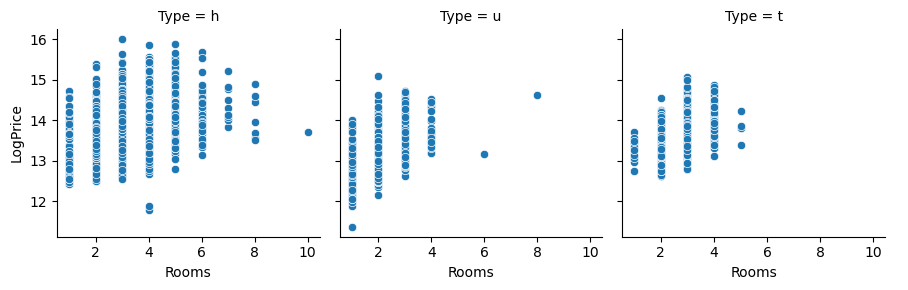

In [32]:
g = sns.FacetGrid(data, col='Type')
g.map(sns.scatterplot, 'Rooms', 'LogPrice')
g.add_legend()

In [33]:
# Type h include bigger houses and therefore more rooms can be found in this category of house, the greater variability of features of such buildings
# lead to a broader price range with higher prices across the number of rooms

In [34]:
areafortype = data.groupby('Type')[['BuildingArea', 'Distance']].agg(['mean', 'median']).reset_index()

# Display the result
print(areafortype)


  Type BuildingArea          Distance       
               mean median       mean median
0    h   176.866248  144.0  10.979479   10.4
1    t   140.046323  130.0   9.851346    9.9
2    u    80.737121   75.0   7.607391    6.9


In [35]:
#houses are farther from the center and are bigger, Type u houses are the closest to the centre but the small Building Area is probably 
#negatively related to the price


## Analsyis for distance 

### Scatterplot distance and LogPrice

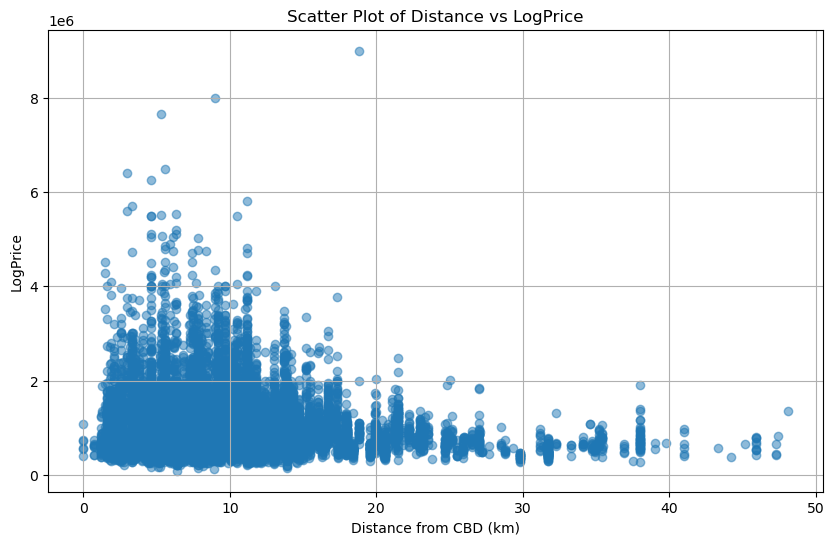

In [36]:
# Scatter plot of Distance vs. Price
plt.figure(figsize=(10, 6))
plt.scatter(data['Distance'], data['Price'], alpha=0.5)
plt.title('Scatter Plot of Distance vs LogPrice')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('LogPrice')
plt.grid(True)
plt.show()

In [37]:
# The graph highlights a non-linear relationship between the two variables

## Analysis Car Space

### Boxplot to explore relationship between LogPrice and Car


Text(0.5, 1.0, 'Relationship Car and LogPrice')

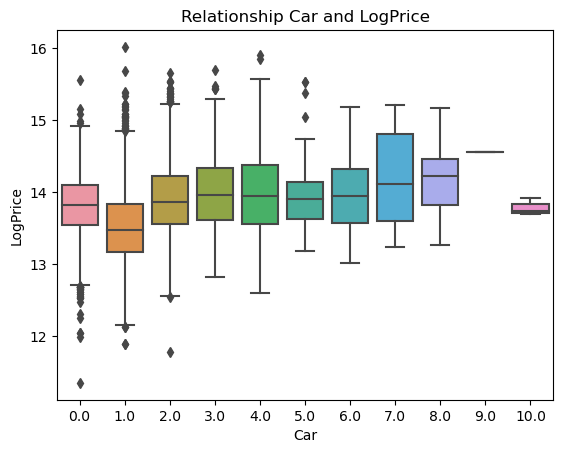

In [38]:
sns.boxplot(x='Car', y='LogPrice', data=data)
plt.title('Relationship Car and LogPrice')

In [39]:
data['Distance_Bracket'] = pd.cut(data['Distance'], bins=20)

In [40]:
datacar = data.groupby('Car')['Distance'].mean()

In [41]:
datacar

Car
0.0      6.469786
1.0      8.755781
2.0     11.774405
3.0     11.263369
4.0     12.775494
5.0     12.252381
6.0     12.751852
7.0     10.162500
8.0     11.988889
9.0     10.200000
10.0    19.966667
Name: Distance, dtype: float64

In [42]:
#houses with no car spaces are really central buildings, this could explain the high price. Houses'prices seem to be positively related
# to number of car spaces until 4 car spaces, then the impact of having an extra car space doesn't seem to increase the price much more

## Interaction Distance and Car


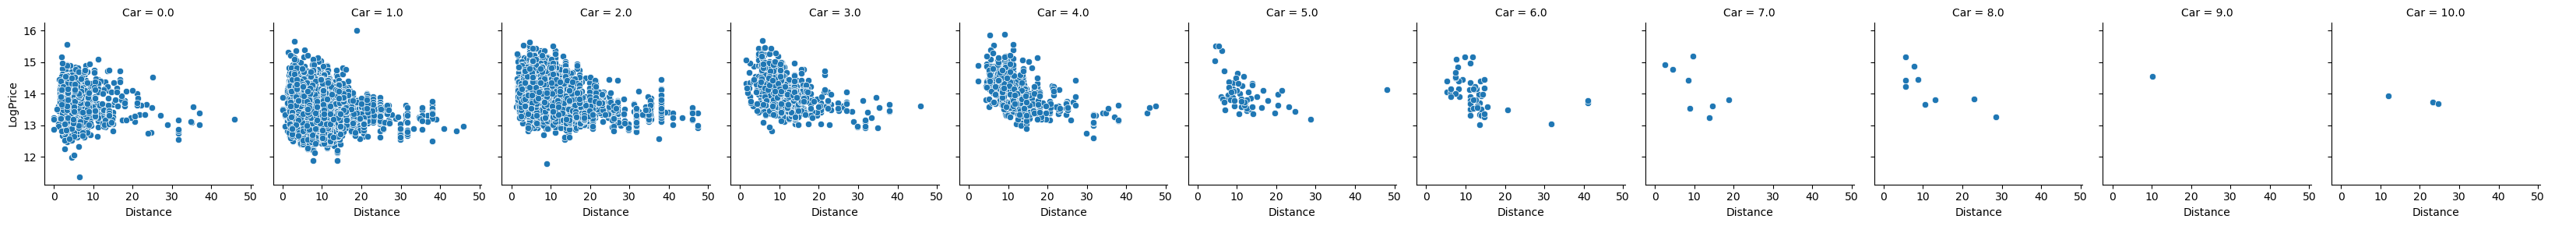

In [43]:
g = sns.FacetGrid(data, col='Car')
g.map(sns.scatterplot, 'Distance', 'LogPrice')
g.add_legend()


In [44]:
#increasing number of car spaces has an higher ( positive ) marginal effect on prices for shorter distances from the center as intuition suggests
# (the cluster of observations shift up)

## Analysis of YearBuilt


In [45]:
# YearBuilt have extreme values, we use the filtered dataset for this part

In [46]:
Q1 = data['YearBuilt'].quantile(0.25)
Q3 = data['YearBuilt'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
data_no_outliers = data[(data['YearBuilt'] >= lower_bound) & (data['YearBuilt'] <= upper_bound)]


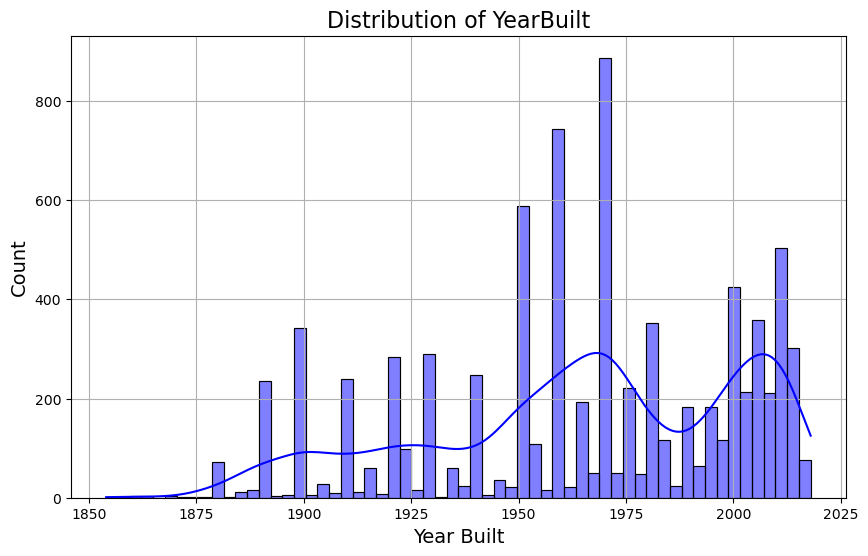

In [47]:
plt.figure(figsize=(10, 6))
sns.histplot(data_no_outliers['YearBuilt'], kde=True, bins=60, color='blue')
plt.title('Distribution of YearBuilt', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.grid(True)
plt.show()

In [48]:
# The graph shows a decrease in the built houses in the past years

## Relationship YearBuilt and Price

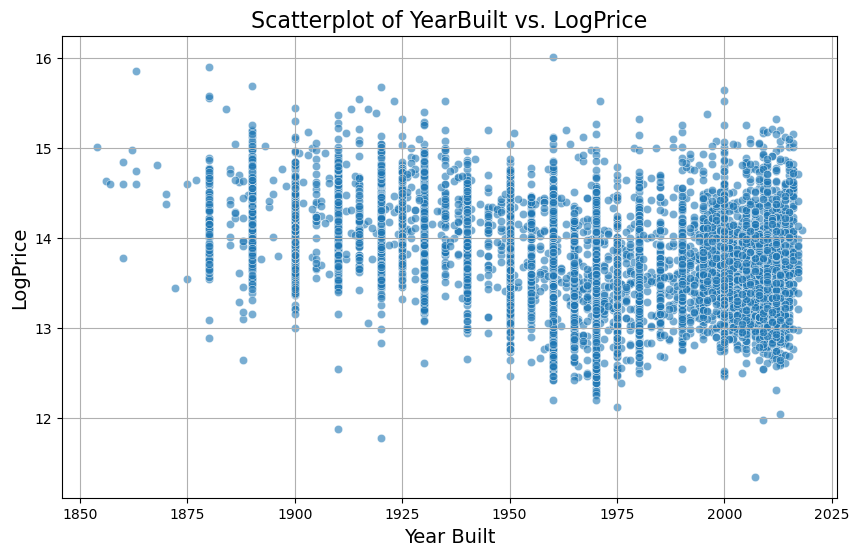

In [49]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='LogPrice', data=data_no_outliers, alpha=0.6)
plt.title('Scatterplot of YearBuilt vs. LogPrice', fontsize=16)
plt.xlabel('Year Built', fontsize=14)
plt.ylabel('LogPrice', fontsize=14)
plt.grid(True)
plt.show()

In [50]:
#Possible negative correlation because new homes are built in less dense, less central neighborhoods

In [51]:
data_no_outliers['Distance_Bracket'] = pd.cut(data['Distance'], bins=20)

/var/folders/vp/3w5dj_l159g93tb2308ztr7r0000gn/T/ipykernel_14331/3846306720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Distance_Bracket'] = pd.cut(data['Distance'], bins=20)


In [52]:
data_no_outliers['Age_Bracket'] = pd.cut(data['YearBuilt'], bins=50)

/var/folders/vp/3w5dj_l159g93tb2308ztr7r0000gn/T/ipykernel_14331/598827379.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_outliers['Age_Bracket'] = pd.cut(data['YearBuilt'], bins=50)


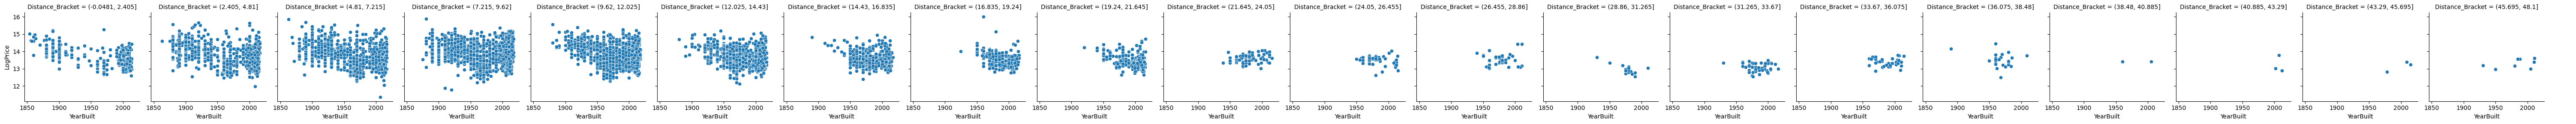

In [53]:
g = sns.FacetGrid(data_no_outliers, col='Distance_Bracket')
g.map(sns.scatterplot, 'YearBuilt', 'LogPrice')
g.add_legend()

In [54]:
datadevelopare = data_no_outliers.groupby('Distance_Bracket')['YearBuilt'].mean()
print(datadevelopare)

Distance_Bracket
(-0.0481, 2.405]    1958.743034
(2.405, 4.81]       1953.198488
(4.81, 7.215]       1951.776754
(7.215, 9.62]       1960.856682
(9.62, 12.025]      1969.906631
(12.025, 14.43]     1973.673711
(14.43, 16.835]     1979.030108
(16.835, 19.24]     1984.452830
(19.24, 21.645]     1990.492386
(21.645, 24.05]     1979.862500
(24.05, 26.455]     1983.727273
(26.455, 28.86]     1976.585366
(28.86, 31.265]     1976.941176
(31.265, 33.67]     1984.000000
(33.67, 36.075]     1988.166667
(36.075, 38.48]     1966.807692
(38.48, 40.885]     1982.500000
(40.885, 43.29]     2007.000000
(43.29, 45.695]     2000.666667
(45.695, 48.1]      1982.375000
Name: YearBuilt, dtype: float64


In [55]:
# The data seem to corroborate our hypothesis

# Heatmap to highlight price in different coordinates


In [56]:
from folium.plugins import HeatMap
	
m = folium.Map(location=[data['Lattitude'].mean(), data['Longtitude'].mean()], zoom_start=10)
#create scaled prices
data['scaled_price'] = (data['Price'] - data['Price'].min()) / (data['Price'].max() - data['Price'].min())
# Add heatmap
heat_data = [[row['Lattitude'], row['Longtitude'], row['scaled_price']] for _, row in data.iterrows()]
HeatMap(heat_data).add_to(m)


m

## Analysis of method

## BoxPlot LogPrice and Method of Sale



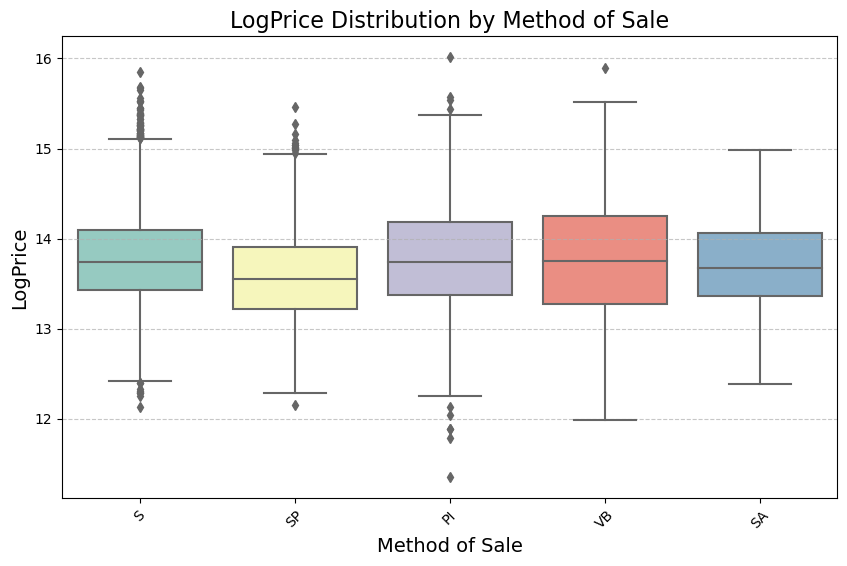

In [57]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Method', y='LogPrice', data=data, palette='Set3')

# Customize the plot
plt.title('LogPrice Distribution by Method of Sale', fontsize=16)
plt.xlabel('Method of Sale', fontsize=14)
plt.ylabel('LogPrice', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show() 

In [58]:
#S - property sold
#SP - property sold prior; PI - property passed in; PN - sold prior not disclosed
#SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn prior to auction; SA -
#sold after auction; SS - sold after auction price not disclosed
#PI - property passed in might have higher prices since the private negotiation after the auction inflates the price

# Random Effects

## Council Area

### Observations per CouncilArea


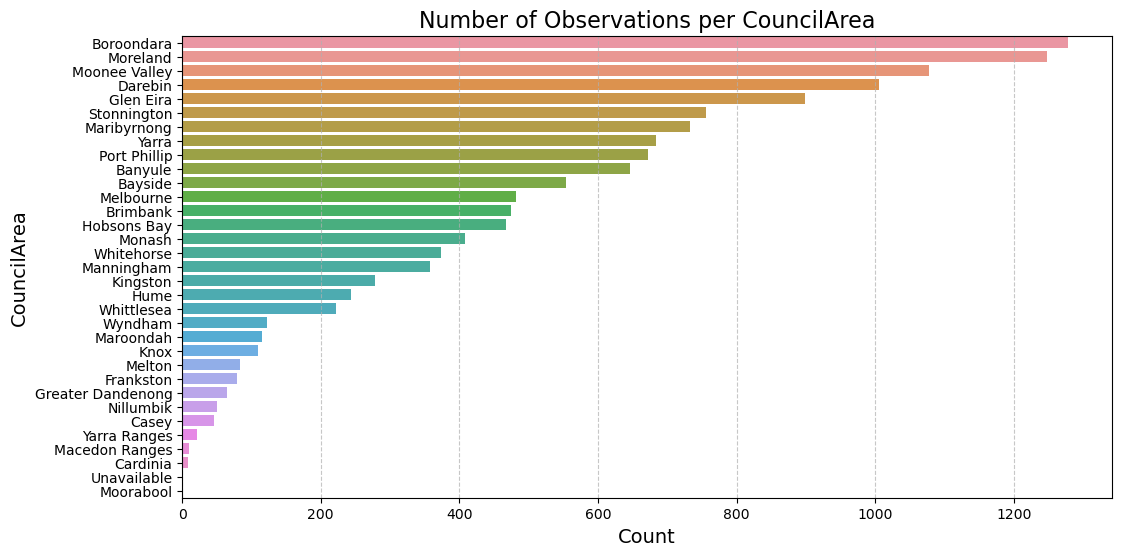

In [59]:
plt.figure(figsize=(12, 6))
sns.countplot(y='CouncilArea', data=data, order=data['CouncilArea'].value_counts().index)
plt.title('Number of Observations per CouncilArea', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('CouncilArea', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [60]:
# The amount of observations might indicate 'hot' real estate markets

### LogPrice relationship with CouncilArea

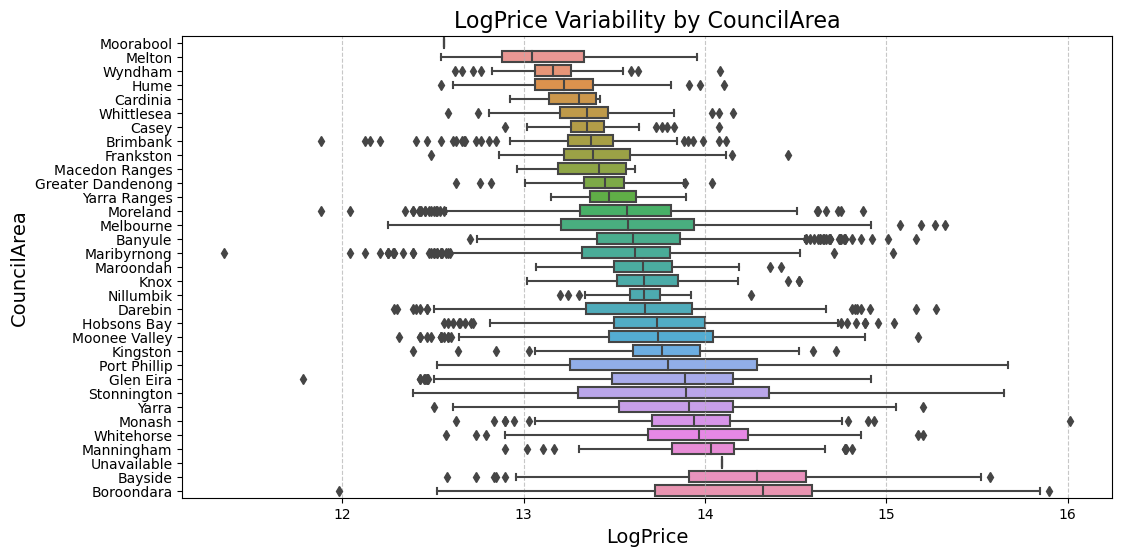

In [61]:
plt.figure(figsize=(12, 6))
sns.boxplot(y='CouncilArea', x='LogPrice', data=data, order=data.groupby('CouncilArea')['LogPrice'].median().sort_values().index)
plt.title('LogPrice Variability by CouncilArea', fontsize=16)
plt.xlabel('LogPrice', fontsize=14)
plt.ylabel('CouncilArea', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [62]:
#Boroondara is among the CouncilArea with most observations and higher price variability, the median price is the highest among the other CouncilArea values

In [63]:
average_distance_price_by_suburb = data.groupby('CouncilArea').agg({
    'Distance': 'mean',  # Average distance
    'Price': 'mean'      # Average price
}).reset_index()

# Sort the result by average price (descending)
sorted_avg_distance_price = average_distance_price_by_suburb.sort_values(by='Price', ascending=False)

# Display the result
print(sorted_avg_distance_price)

          CouncilArea   Distance         Price
2          Boroondara   7.764476  1.689132e+06
1             Bayside  12.477076  1.682636e+06
27        Unavailable  13.800000  1.325000e+06
26        Stonnington   5.975397  1.321400e+06
15         Manningham  13.547765  1.249726e+06
28         Whitehorse  13.274332  1.239906e+06
20             Monash  14.408824  1.189118e+06
25       Port Phillip   4.945982  1.177167e+06
31              Yarra   2.728697  1.141297e+06
8           Glen Eira  11.712903  1.091401e+06
10        Hobsons Bay   9.248822  1.008112e+06
21      Moonee Valley   8.570594  9.994378e+05
12           Kingston  19.244604  9.956282e+05
0             Banyule  11.123994  9.489168e+05
18          Melbourne   2.641996  9.319969e+05
6             Darebin   8.649702  9.241809e+05
13               Knox  21.218182  9.126526e+05
17          Maroondah  21.895652  8.862913e+05
24          Nillumbik  18.700000  8.686180e+05
23           Moreland   8.616106  8.348129e+05
16        Mar

In [64]:
from tabulate import tabulate

# Filter out rows where CouncilArea is 'Unavailable'
filtered_data = data[data['CouncilArea'] != 'Unavailable']

# Group by Regionname and get unique CouncilArea values
region_council_mapping = filtered_data.groupby('Regionname')['CouncilArea'].unique().reset_index()

# Rename columns for clarity
region_council_mapping.columns = ['Regionname', 'CouncilAreas']

# Display the result as a nice table
print(tabulate(region_council_mapping, headers='keys', tablefmt='pretty', showindex=False))



+----------------------------+----------------------------------------------------------------------------+
|         Regionname         |                                CouncilAreas                                |
+----------------------------+----------------------------------------------------------------------------+
|    Eastern Metropolitan    |    ['Whitehorse' 'Manningham' 'Banyule' 'Knox' 'Maroondah' 'Nillumbik'     |
|                            |                           'Boroondara' 'Monash']                           |
|      Eastern Victoria      |     ['Casey' 'Frankston' 'Yarra Ranges' 'Cardinia' 'Manningham' None]      |
|   Northern Metropolitan    | ['Yarra' 'Darebin' 'Moreland' 'Moonee Valley' 'Melbourne' 'Banyule' 'Hume' |
|                            |                       'Whittlesea' 'Nillumbik' None]                       |
|     Northern Victoria      |  ['Nillumbik' 'Whittlesea' 'Macedon Ranges' 'Yarra Ranges' 'Melton' None]  |
| South-Eastern Metropolitan

In [65]:


# Filter out rows where CouncilArea is 'Unavailable'
filtered_data = data[data['CouncilArea'] != 'Unavailable']

# Group by CouncilArea and get unique Regionname values
council_region_mapping = filtered_data.groupby('CouncilArea')['Regionname'].unique().reset_index()

# Rename columns for clarity
council_region_mapping.columns = ['CouncilArea', 'Regions']

# Display the result as a nice table
print(tabulate(council_region_mapping, headers='keys', tablefmt='pretty', showindex=False))


+-------------------+----------------------------------------------------------------------+
|    CouncilArea    |                               Regions                                |
+-------------------+----------------------------------------------------------------------+
|      Banyule      |           ['Eastern Metropolitan' 'Northern Metropolitan']           |
|      Bayside      |                      ['Southern Metropolitan']                       |
|    Boroondara     |           ['Southern Metropolitan' 'Eastern Metropolitan']           |
|     Brimbank      |                       ['Western Metropolitan']                       |
|     Cardinia      |                         ['Eastern Victoria']                         |
|       Casey       |          ['Eastern Victoria' 'South-Eastern Metropolitan']           |
|      Darebin      |                      ['Northern Metropolitan']                       |
|     Frankston     |          ['South-Eastern Metropolitan' 'Eastern 

## Regionname Analysis

### Observations per Regionname

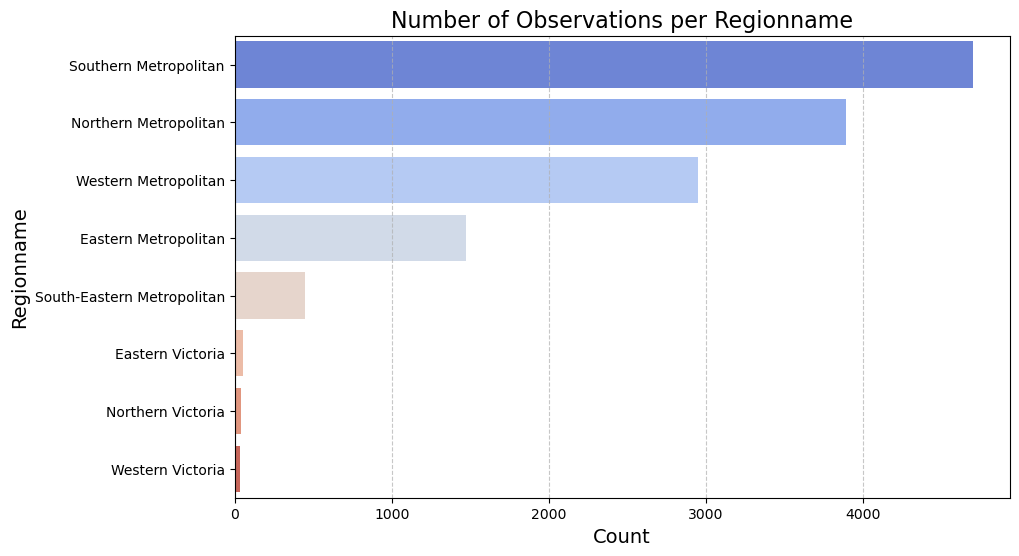

In [66]:
plt.figure(figsize=(10, 6))
sns.countplot(y='Regionname', data=data, order=data['Regionname'].value_counts().index, palette='coolwarm')
plt.title('Number of Observations per Regionname', fontsize=16)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Regionname', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

### Price Variability Across Regionnames

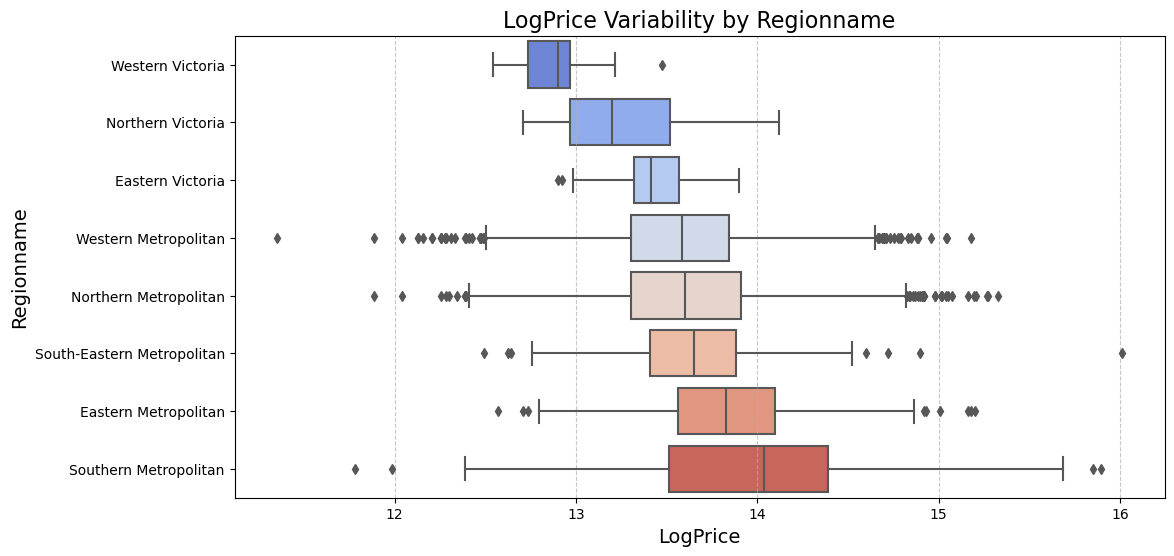

In [67]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='LogPrice', y='Regionname', data=data, palette='coolwarm', order=data.groupby('Regionname')['LogPrice'].median().sort_values().index)
plt.title('LogPrice Variability by Regionname', fontsize=16)
plt.xlabel('LogPrice', fontsize=14)
plt.ylabel('Regionname', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [68]:
# Southern Metropolitan shows more variability since it is the area with most transactions and containg heterogeneous properties°

## Time Frame analysis

In [69]:
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

In [70]:
price_trend = data.groupby('Date')['LogPrice'].mean().reset_index()

In [71]:
price_trend_nolog =data.groupby('Date')['Price'].mean().reset_index()

### Absolute price trend over the years

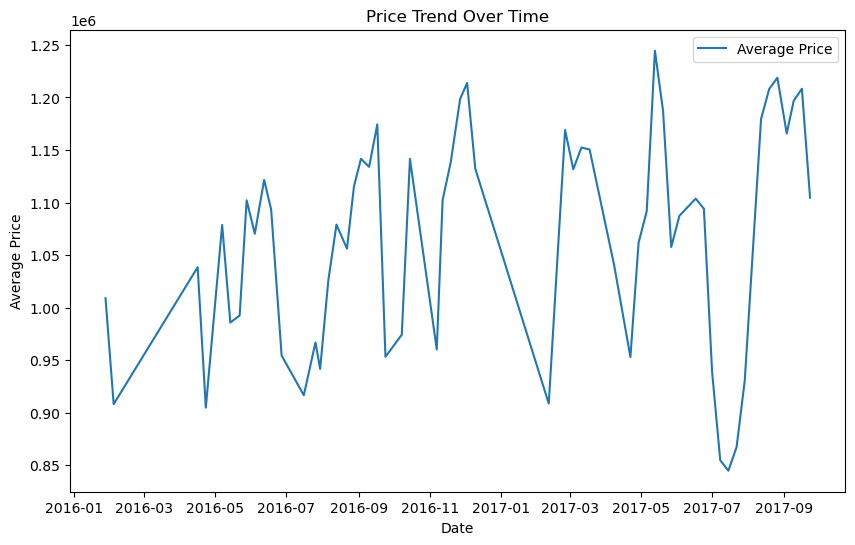

In [72]:
plt.figure(figsize=(10, 6))
plt.plot(price_trend_nolog['Date'], price_trend_nolog['Price'], label='Average Price')
plt.title('Price Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.legend()
plt.show()

In [73]:
# High variation across the months, we explore it more

### LogPrice variation across the months

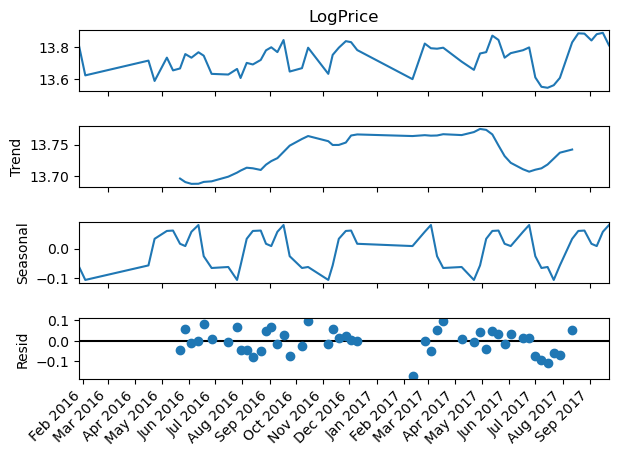

In [74]:
from matplotlib.dates import MonthLocator, DateFormatter

from statsmodels.tsa.seasonal import seasonal_decompose


# Assuming 'price_trend' is a DataFrame with 'Date' and 'Price' columns
# Ensure the 'Date' column is in datetime format
price_trend['Date'] = pd.to_datetime(price_trend['Date'], format='%d/%m/%Y')  # Convert to datetime
price_trend.set_index('Date', inplace=True)  # Set 'Date' as index for time series

# Perform time series decomposition
decomposition = seasonal_decompose(price_trend['LogPrice'], model='additive', period=12)
fig = decomposition.plot()

# Set monthly ticks and format the labels
plt.gca().xaxis.set_major_locator(MonthLocator(interval=1))  # Monthly ticks
plt.gca().xaxis.set_major_formatter(DateFormatter('%b %Y'))  # Format as "Month Year" (e.g., Dec 2016)

# Rotate and align x-axis labels for better visibility
plt.gcf().autofmt_xdate(rotation=45, ha='right')  # Rotate labels

plt.show()

In [75]:
## evident seasonality 

### Density plot of Price (absolute) for each year

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


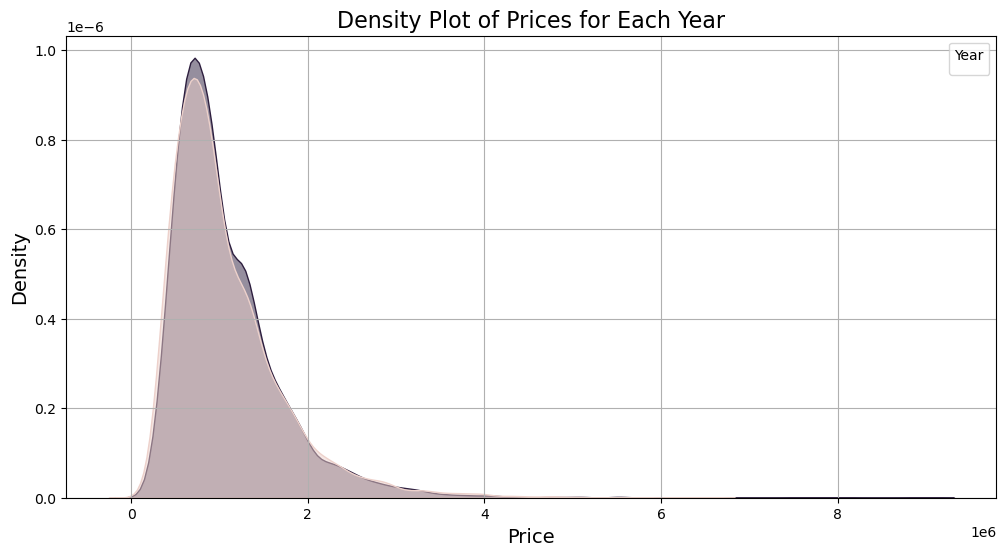

In [76]:
data['Year'] = data['Date'].dt.year

# Plot density plot for each year
plt.figure(figsize=(12, 6))
sns.kdeplot(data=data, x='Price', hue='Year', fill=True, common_norm=False, alpha=0.5)

# Add titles and labels
plt.title('Density Plot of Prices for Each Year', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.legend(title='Year', fontsize=10)
plt.grid(True)
plt.show()


<AxesSubplot:xlabel='Price', ylabel='Count'>

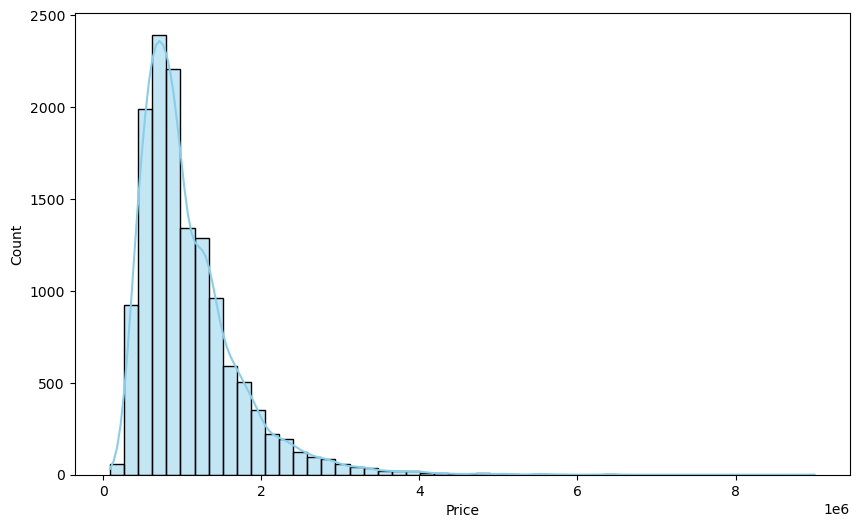

In [77]:
plt.figure(figsize=(10,6))
sns.histplot(data['Price'], kde=True, bins=50, color='skyblue')

In [78]:
# Absolute Prices haven't changed much across the 2 years time frame

### Price seasonality over the different months

In [79]:
data['Month']= data['Date'].dt.month
data['Year'] = data['Date'].dt.year

In [80]:
count_by_month_year = data.groupby(['Year', 'Month'])['Price'].count()

In [81]:
print(count_by_month_year)

Year  Month
2016  1           2
      2          26
      4         318
      5         899
      6         732
      7         446
      8         716
      9         925
      10        551
      11       1114
      12        607
2017  2         417
      3         678
      4         631
      5        1130
      6        1098
      7        1536
      8         834
      9         920
Name: Price, dtype: int64


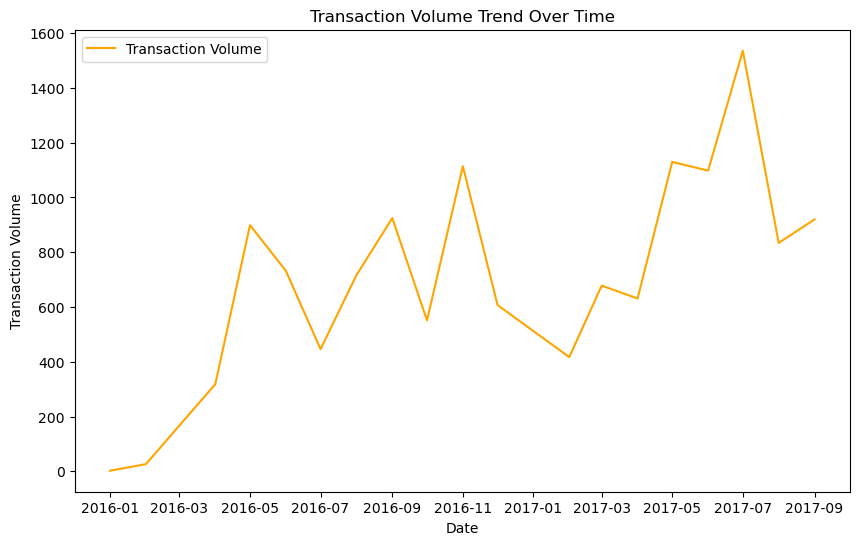

In [83]:

data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year
count_by_month_year = data.groupby(['Year', 'Month'])['Price'].count().reset_index()


count_by_month_year['Date'] = pd.to_datetime(
    count_by_month_year[['Year', 'Month']].assign(Day=1)
)


plt.figure(figsize=(10, 6))
plt.plot(count_by_month_year['Date'], count_by_month_year['Price'], label='Transaction Volume', color='orange')
plt.title('Transaction Volume Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Volume')
plt.legend()
plt.show()

In [ ]:
# Most deals have been made in November 2016, May 2017, July 2017

### Average price of the deals for each month

In [ ]:
monthprice = data.groupby('Month')['Price'].mean()

In [ ]:
monthprice.sort_values(ascending=False)

In [ ]:
# Plot the boxplot with hue for Year
plt.figure(figsize=(12, 6))
sns.boxplot(x='Month', y='LogPrice', hue='Year', data=data)
plt.xticks(rotation=45)
plt.title('LogPrice Distribution Over Time by Month and Year')
plt.xlabel('Month')
plt.ylabel('LogPrice')
plt.legend(title='Year', loc='upper left')
plt.show()


In [ ]:
#December deals had on average the greatest value